In [1]:
# Copyright 2023 The Cirq Developers
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# T Complexity

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qualtran.bloqs.mcmt import And, MultiAnd
from qualtran._infra.gate_with_registers import get_named_qubits
from qualtran.cirq_interop.t_complexity_protocol import t_complexity

## Two Qubit And Gate

In [3]:
# And of two qubits
gate = And() # create an And gate
# create an operation
operation = gate.on_registers(**get_named_qubits(gate.signature))
# this operation doesn't directly support TComplexity but it's decomposable and its components are simple.
print(t_complexity(operation))

T-count:   4
Rotations: 0
Cliffords: 9



## Adjoint of two qubit And gate

In [4]:
gate = And() ** -1 # adjoint of And
operation = gate.on_registers(**get_named_qubits(gate.signature))
# the deomposition is H, measure, CZ, and Reset
print(t_complexity(operation))

T-count:   0
Rotations: 0
Cliffords: 4



## And gate on n qubits

In [5]:
n = 5
gate = MultiAnd((1, )*n)
operation = gate.on_registers(**get_named_qubits(gate.signature))
print(t_complexity(operation))

T-count:   16
Rotations: 0
Cliffords: 36



In [6]:
def Generate(n_max: int = 10):
    """Returns the #T when the number of qubits is between 3 and n_max inclusive"""
    n_controls = []
    t_count = []
    for n in range(3, n_max + 2):
        n_controls.append(n)
        gate = MultiAnd(cvs=(1, )*n)
        op = gate.on_registers(**get_named_qubits(gate.signature))
        c = t_complexity(op)
        t_count.append(c.t)
    return n_controls, t_count

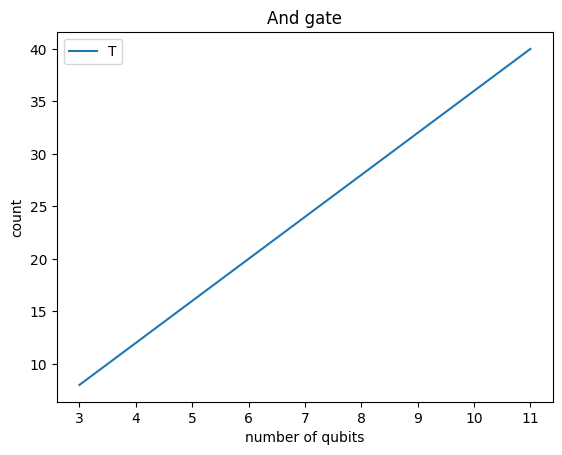

In [7]:
n_controls, t_count = Generate()
plt.plot(n_controls, t_count, label='T')
plt.ylabel('count')
plt.xlabel('number of qubits')
plt.title('And gate')
plt.legend()
plt.show()